# 可选实验：代价函数 
<figure>
    <center> <img src="./images/C1_W1_L3_S2_Lecture_b.png"  style="width:1000px;height:200px;" ></center>
</figure>



## 目标
在本实验中，您将：
- 实现并探索单变量线性回归的 `cost`（代价）函数。 


## 工具
在本实验中，我们将使用：
- NumPy，一个流行的科学计算库
- Matplotlib，一个流行的数据绘图库
- 本地目录中 lab_utils_uni.py 文件中的本地绘图例程

In [10]:
! pip install ipympl

zsh:1: command not found: pip


In [11]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

## 问题陈述

您希望有一个模型可以根据房屋大小预测房价。
让我们使用与上一个实验相同的两个数据点 - 一栋 1000 平方英尺的房子以 30 万美元售出，一栋 2000 平方英尺的房子以 50 万美元售出。

| 尺寸（1000 平方英尺）     | 价格（千美元） |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [2]:
x_train = np.array([1.0, 2.0])           #(尺寸，单位：1000 平方英尺)
y_train = np.array([300.0, 500.0])           #(价格，单位：千美元)

## 计算代价
本作业中的术语 'cost'（代价）可能会有些混淆，因为数据是房屋成本。在这里，代价是衡量我们的模型预测房屋目标价格的准确程度的指标。术语 'price'（价格）用于房屋数据。

单变量的代价方程为：
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
其中 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ 是我们使用参数 $w,b$ 对样本 $i$ 的预测。  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ 是目标值与预测值之间的平方差。   
- 这些差值在所有 $m$ 个样本上求和，然后除以 `2m` 以产生代价 $J(w,b)$。  
>注意，在课程中求和范围通常从 1 到 m，而代码将从 0 到 m-1。


下面的代码通过循环遍历每个样本来计算代价。在每次循环中：
- 计算 `f_wb`，即预测值
- 计算目标值与预测值之间的差值并平方。
- 将其添加到总代价中。

In [3]:
def compute_cost(x, y, w, b): 
    """
    计算线性回归的代价函数。
    
    参数:
      x (ndarray (m,)): 数据，m 个样本 
      y (ndarray (m,)): 目标值
      w,b (scalar)    : 模型参数  
    
    返回
        total_cost (float): 使用 w,b 作为线性回归参数来拟合 x 和 y 中的数据点的代价
    """
    # 训练样本数量
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

## 代价函数直观理解

<img align="left" src="./images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:380px; padding: 10px;  " /> 您的目标是找到一个模型 $f_{w,b}(x) = wx + b$，具有参数 $w,b$，该模型将根据输入 $x$ 准确预测房屋价值。代价是衡量模型在训练数据上准确程度的指标。

上面的代价方程 (1) 表明，如果可以选择 $w$ 和 $b$ 使得预测 $f_{w,b}(x)$ 匹配目标数据 $y$，则 $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ 项将为零，代价最小化。在这个简单的两点示例中，您可以实现这一点！

在上一个实验中，您确定 $b=100$ 提供了最优解，所以让我们将 $b$ 设置为 100 并专注于 $w$。

<br/>
下面，使用滑块控件选择使代价最小的 $w$ 值。绘图可能需要几秒钟才能更新。

In [6]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

该图包含几个值得注意的点。
- 当 $w = 200$ 时，代价最小，这与上一个实验的结果一致
- 由于代价方程中对目标值和预测值之间的差值进行了平方，当 $w$ 太大或太小时，代价会迅速增加。
- 使用通过最小化代价选择的 `w` 和 `b` 会产生一条完美拟合数据的直线。

## 代价函数可视化 - 3D

您可以通过 3D 绘图或使用等高线图来查看代价如何随 `w` 和 `b` *两者*变化。
值得注意的是，本课程中的一些绘图可能会变得相当复杂。提供了绘图例程，虽然阅读代码以熟悉这些方法可能很有启发性，但成功完成课程并不需要这样做。这些例程位于本地目录中的 lab_utils_uni.py 文件中。

### 更大的数据集
查看具有更多数据点的场景很有启发性。此数据集包含不在同一条线上的数据点。这对代价方程意味着什么？我们能否找到使代价为 0 的 $w$ 和 $b$？ 

In [4]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

在等高线图中，点击一个点以选择 `w` 和 `b` 以实现最低代价。使用等高线来指导您的选择。注意，更新图形可能需要几秒钟。

**重要提示：** 交互式点击功能需要交互式 matplotlib 后端。如果当前使用的是 `%matplotlib inline`，点击功能将无法工作。要启用交互功能，请：
1. 安装 ipympl：`pip install ipympl`
2. 将第一个单元格中的 `%matplotlib inline` 改为 `%matplotlib widget`
3. 重新运行所有单元格 

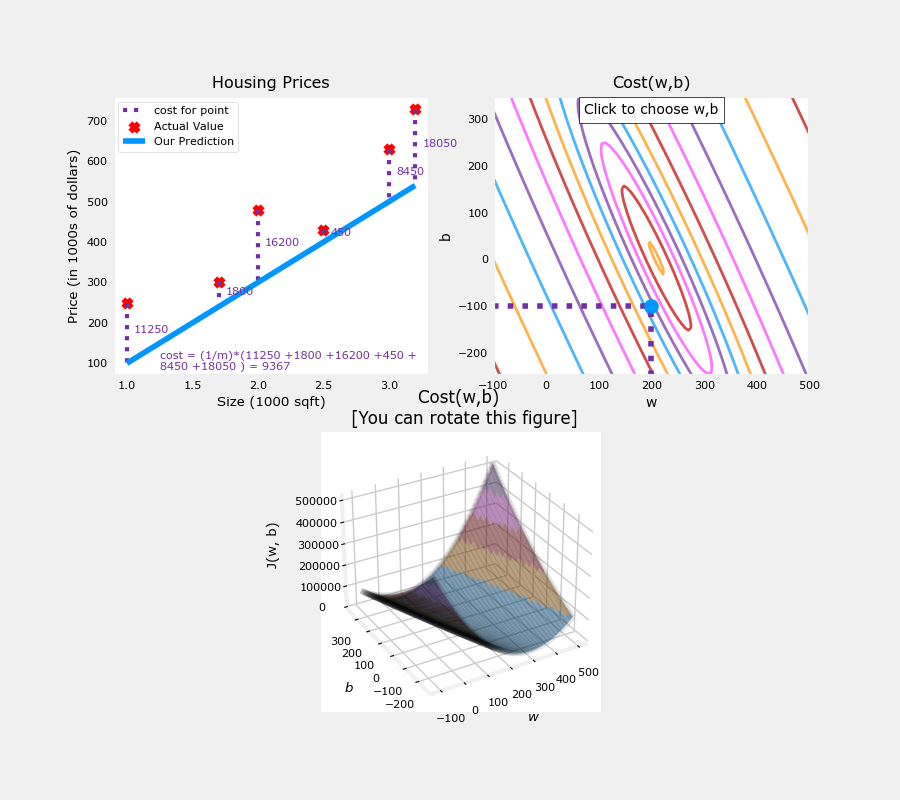

In [12]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

上面，请注意左图中的虚线。这些表示训练集中每个样本贡献的代价部分。在这种情况下，大约 $w=209$ 和 $b=2.4$ 的值提供低代价。请注意，因为我们的训练样本不在一条线上，所以最小代价不为零。

### 凸代价曲面
代价函数对损失进行平方这一事实确保了'误差曲面'像汤碗一样是凸的。它总是有一个最小值，可以通过在所有维度上跟随梯度来达到。在前面的图中，因为 $w$ 和 $b$ 维度的缩放不同，这不容易识别。下面的图，其中 $w$ 和 $b$ 是对称的，在课程中已显示：

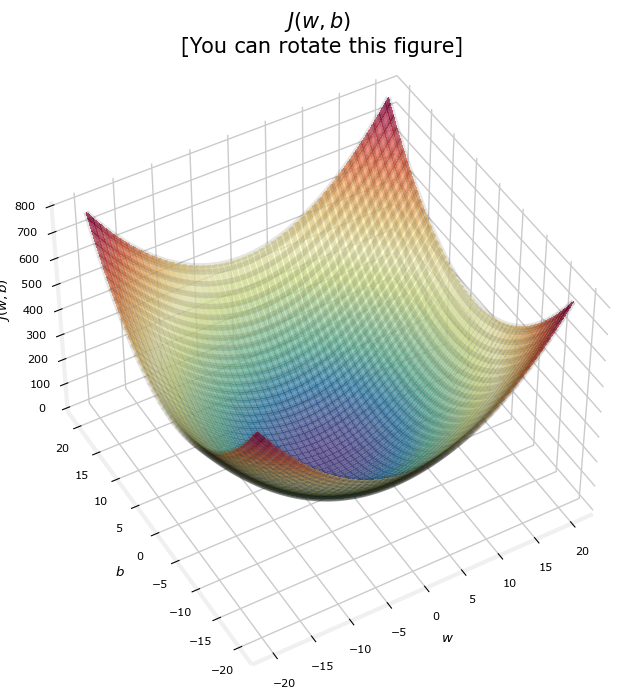

In [8]:
soup_bowl()

# 恭喜！
您已经学习了以下内容：
 - 代价方程提供了衡量您的预测与训练数据匹配程度的指标。
 - 最小化代价可以提供 $w$、$b$ 的最优值。